# Exploratory Data Analysis on Movies
### Phase 1 Project - Dorjey Sherpa

![studiologos](Images/studio_logos.png)

## TL;DR
 - USA makes the more movies than the next nine countries movie producing countries.
 - Majority of the movies are profitable, either domestic or foreign or both. 
 - Studio of the movie does not seem to matter. However, the power of a studio might have an effct on the scripts/directors/writers/etc. (extrapolating). 
 - Entering as a brand new studio might be difficult, especially when larger studios are releasing more than 10 blockbuster titles a year. 
 - From 2010 to 2018, Buena Vista (subsidary of Disney) had the highest grossing out of all studios at \\$31,818,940,000 - with net profit at \\$22,428,140,000 but stuidio with the best return on investment from 2010-2018 is Warner Brothers and Universal Studios. 


# Overview

This project inspects the film industry to provide essential insights to Microsoft potentail Film Division. Exploratory data analysis has been conducted on several movie database to provide the necesary insights. My initial findings show that there is a large competition 

# Business Problem
Microsoft has recently lost trying to acquire Tik-Tok to Oracle and Walmart. Now Microsoft would like to allocate that money in creating their own original video content after seeing the success of Netflix, Hulu and Amazon Prime Video. 


# Questions to consider:
1. How much does it cost to get started? What can Microsoft expect?
2. Does the studio of the movie maker matter?
3. How many movies were released in a given year and who released it? 
4. Which movie made the most? how does the rating(popularity/vote_average) correlate with that?
5. Where is the money coming for --> domestic or foreign?


# Data 
This exploratory data analysis (EDA) is conducted on the Box Office Mojo (bom) database, The Movie Database (tmdb), International Movie Database (imdb) and TN database. This EDA will assist Microsoft in considering if they should enter the Movie industry. Using the information from these different databases, I illustrate my findings and advise what the next steps should be for Microsoft.

### Data used:
The data is collected by a third party (Flatiron School)
1. tn.movie_budgets.csv.gz
        - Part of theMovieDB.org. 
        - used to for the production budget values. 
2. bom.movie_gross.csv.gz
        - used for the title, studio and domestic and foreign gross. 
3. tmdb.movies.csv.gz
        - used for release date, vote count and vote average
4. title_akas = pd.read_csv('./zippeddata/imdb.title.akas.csv.gz')
        - used for data on region 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#International Movie Database 
title_akas = pd.read_csv('./zippeddata/imdb.title.akas.csv.gz')
#Box office Mojo Database
movie_db = pd.read_csv('movie_db.csv')

# Prelimanary Findings

Analyzing Title Akas from IMDB for its region. 

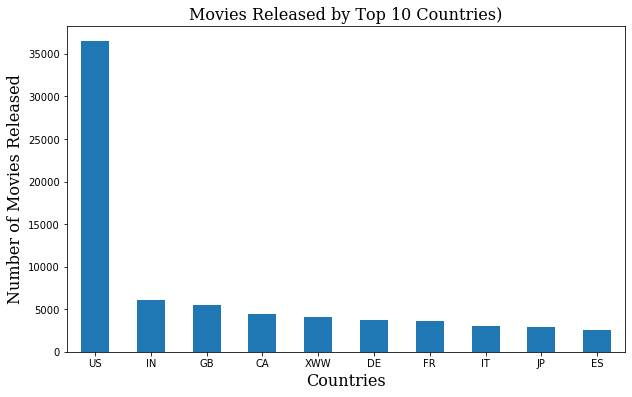

In [3]:
title_akas.drop(columns = ["ordering", "language","types","attributes","is_original_title"], inplace = True)
title_akas.drop_duplicates(subset=['title_id'],inplace = True)
movies_released_region = title_akas.region.value_counts()[:10]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

movies_released_region.plot(kind= "bar", figsize = (10,6))
plt.title("Movies Released by Top 10 Countries)", fontdict = font)
plt.xlabel("Countries", fontdict = font)
plt.ylabel("Number of Movies Released", fontdict = font)
plt.xticks(rotation=0);
plt.savefig('images/top_10_countries.png', bbox_inches = "tight");

USA produces a lot of movies. In fact, USA produces just as many as the next nine countries combined. Its outrageous how much is invested in Movies. However, for Microsoft, this is good news. 

# The Next Few Graphs are a series of analysis on the production budget, domestic gorss, foreign gross, total gross, total profit and the ROI. 

In [4]:
#tots = total sum for each year; getting the mean and median dataframes as well
tots=movie_db.groupby("year")["production_budget", "domestic_gross", "foreign_gross", "total_gross","total_profit"].sum()[:25]
median_df=movie_db.groupby("year")["production_budget", "domestic_gross", "foreign_gross", "total_gross","total_profit"].agg("median")[:25]
mean_df=movie_db.groupby("year")["production_budget", "domestic_gross", "foreign_gross", "total_gross","total_profit"].agg("mean")[:25]
roi_df=movie_db.groupby("year")["roi_percentage"].agg("mean")[:25]

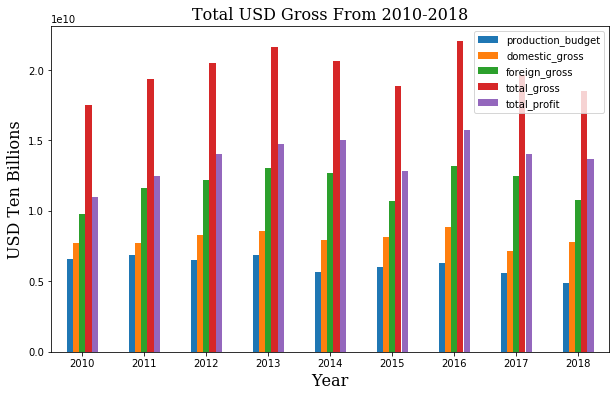

In [5]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
tots.plot(kind = "bar", figsize = (10,6))
plt.ylabel("USD Ten Billions", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Total USD Gross From 2010-2018", fontdict=font);
plt.xticks(rotation=0)
plt.savefig('images/total_gross_2010_2018.png', bbox_inches = "tight");



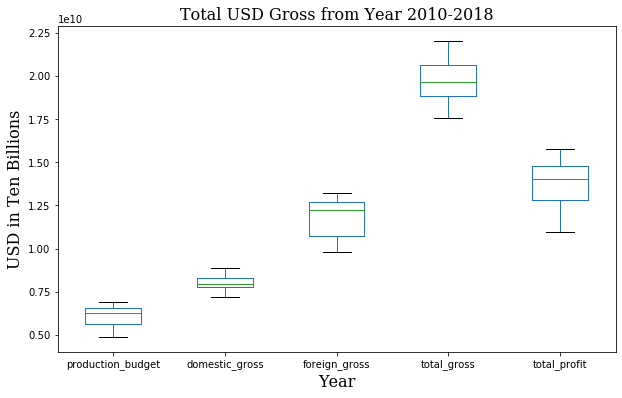

In [6]:
tots.plot(kind = "box", figsize = (10,6))
plt.ylabel("USD in Ten Billions", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Total USD Gross from Year 2010-2018", fontdict=font);
plt.savefig('images/total_gross_boxplot_2010_2018.png', bbox_inches = "tight");

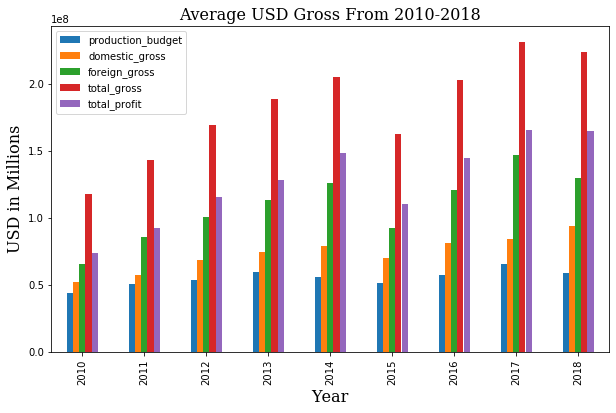

In [7]:
mean_df.plot(kind = "bar", figsize = (10,6))
plt.ylabel("USD in Millions", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Average USD Gross From 2010-2018", fontdict=font);
plt.savefig('images/avg_gross_2010_2018.png', bbox_inches = "tight");

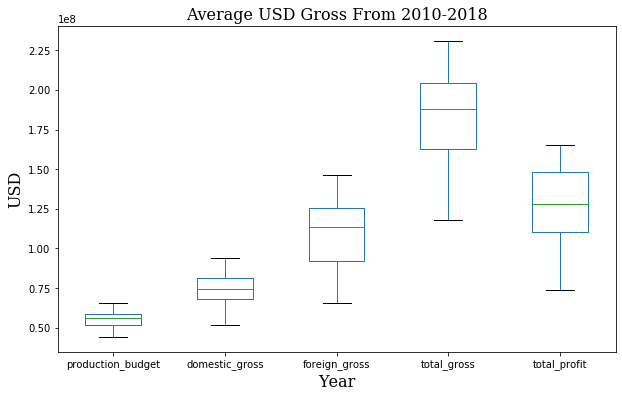

In [8]:
mean_df.plot(kind = "box", figsize = (10,6))
plt.ylabel("USD", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Average USD Gross From 2010-2018", fontdict=font);
plt.savefig('images/avg_gross_boxplot_2010_2018.png', bbox_inches = "tight");

# The Box plot demonstrates that Microsoft can expect to spend anywhere from \\$100,000 to \\$75 million on one movie

# Below is the analysis for top 25 highest movie producing studios 

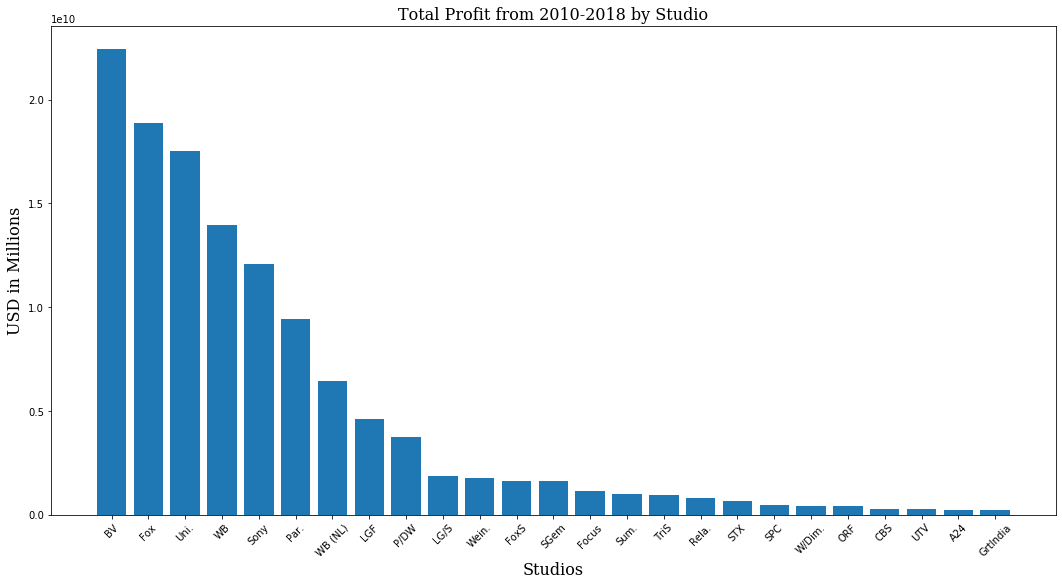

In [9]:
studio_df=movie_db.groupby("studio")["domestic_gross", "foreign_gross", "total_gross","total_profit"].sum().sort_values(by="total_profit", ascending = False)[:25]
fig, ax = plt.subplots(figsize = (18,9))

x= studio_df.index
y= studio_df["total_profit"]
ax.bar(x,y, linewidth=1)
ax.set_title("Total Profit from 2010-2018 by Studio", fontdict=font)
ax.set_ylabel("USD in Millions", fontdict=font )
ax.set_xlabel("Studios", fontdict=font)
plt.xticks(rotation=45);
#plt.ticklabel_format(style='plain', axis='y')
plt.savefig('images/total_profit_2010_2018.png', bbox_inches = "tight");

### In terms of total profit, Buena Vista (subsidary of Disney) is doing really well! Runner ups are Fox, Universal and Warner Brothers. These Film tycoons are no shocker! Now lets look at the Average Total Profit. 

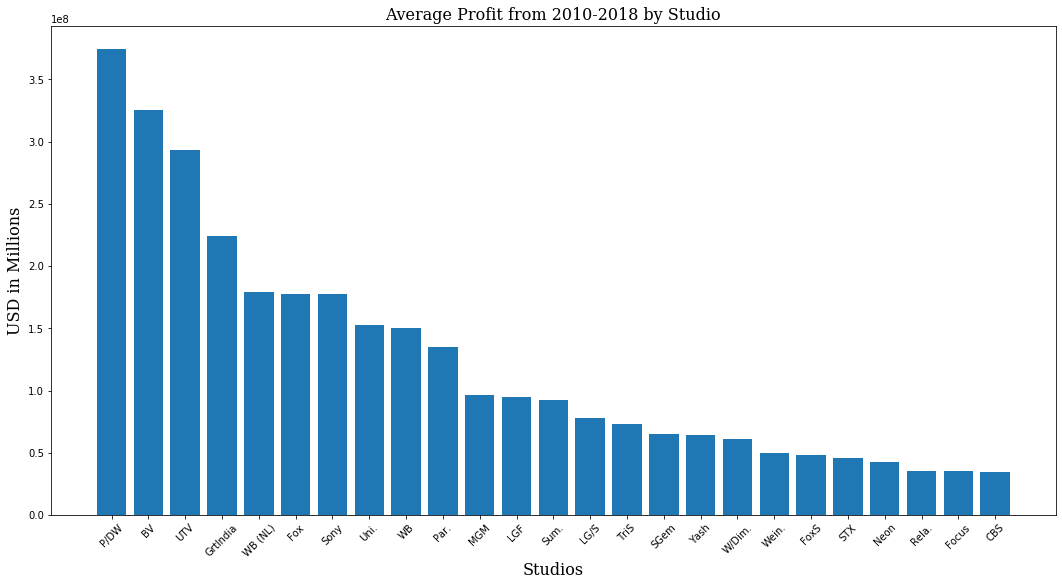

In [10]:
avg_studio_df=movie_db.groupby("studio")["domestic_gross", "foreign_gross", "total_gross","total_profit"].agg("mean").sort_values(by="total_profit", ascending = False)[:25]
fig, ax = plt.subplots(figsize = (18,9))

x= avg_studio_df.index
y= avg_studio_df["total_profit"]
ax.bar(x,y, linewidth=1)
ax.set_title("Average Profit from 2010-2018 by Studio", fontdict=font)
ax.set_ylabel("USD in Millions", fontdict=font )
ax.set_xlabel("Studios", fontdict=font)
plt.xticks(rotation=45);
#plt.ticklabel_format(style='plain', axis='y')
plt.savefig('images/avg_total_profit_2010_2018.png', bbox_inches = "tight");

## P/DW = Pixar/Dream Works is at first place. However, on average, Fox, Universal and Warner Brothers are towards the middle... That would mean that some of their movies are not performing well. 

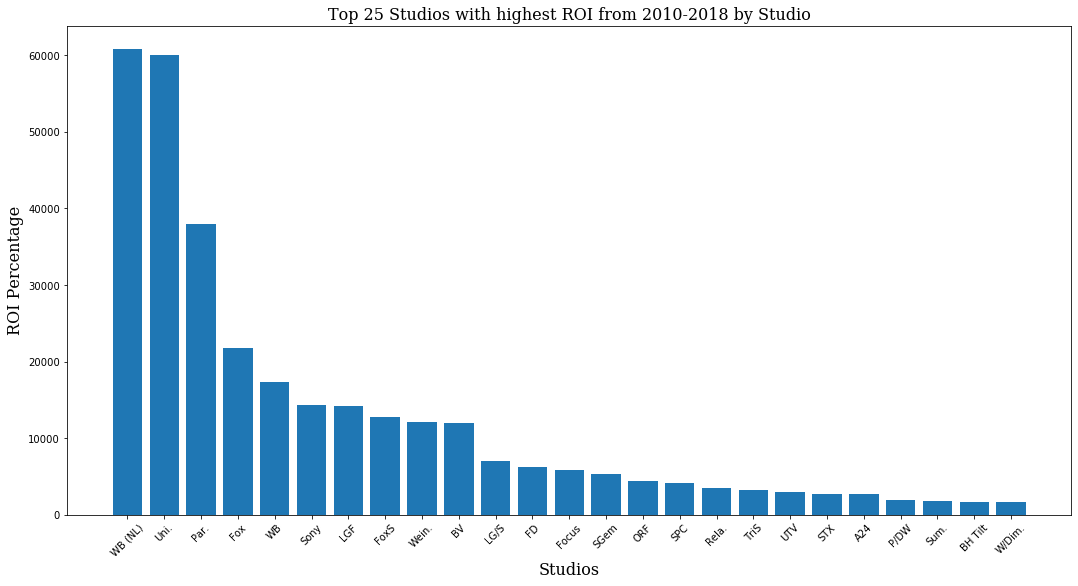

In [11]:
studio_df=movie_db.groupby("studio")["roi_percentage", "total_gross","total_profit"].sum().sort_values(by="roi_percentage", ascending = False)[:25]
fig, ax = plt.subplots(figsize = (18,9))

x= studio_df.index
y= studio_df["roi_percentage"]
ax.bar(x,y, linewidth=1)
ax.set_title("Top 25 Studios with highest ROI from 2010-2018 by Studio", fontdict=font)
ax.set_ylabel("ROI Percentage", fontdict=font )
ax.set_xlabel("Studios", fontdict=font)
plt.xticks(rotation=45);
#plt.ticklabel_format(style='plain', axis='y')
plt.savefig('images/roi_2010_2018.png', bbox_inches = "tight");

### However, when you consider the ROI, Warner Brothers and Universal seem to be good bets. Pixar/Dream Works were averaging a high profit, but their ROI is fairly low. 

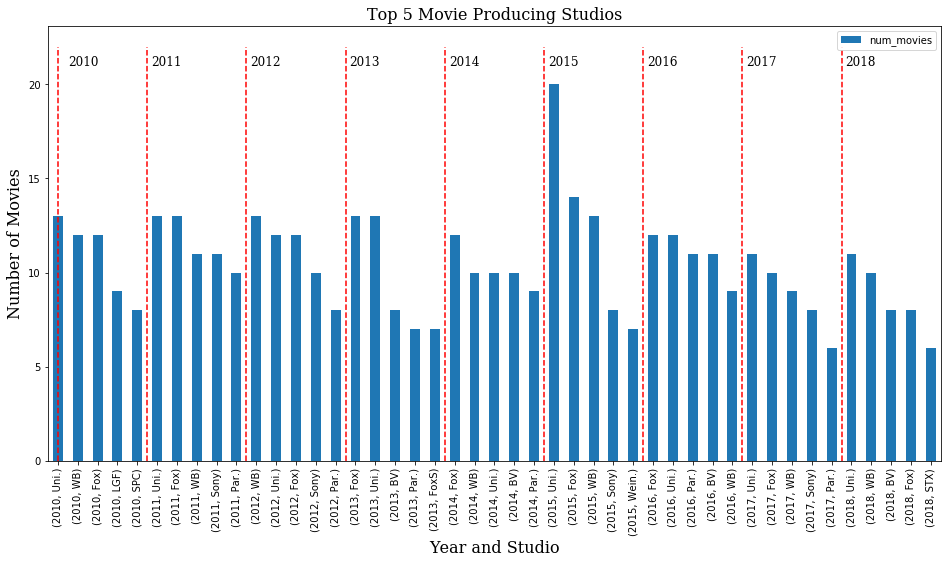

In [12]:
DJB=pd.DataFrame(movie_db.groupby(["year"])["studio"].value_counts(ascending = False))
DJB.rename(columns={"studio":"num_movies"}, inplace = True)

font4 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

top_5studio_per_year = DJB.groupby(level=[0]).apply(lambda x:x.groupby(level=[1]).sum().sort_values('num_movies',ascending=False).head(5))
top_5studio_per_year.plot(kind= "bar", figsize = (16,8))

plt.title("Top 5 Movie Producing Studios", fontdict=font)
plt.xlabel("Year and Studio", fontdict=font)
plt.ylabel("Number of Movies", fontdict=font);
plt.vlines([0,4.5,9.5,14.5,19.5,24.5,29.5,34.5,39.5],0,22,color="red",linestyles="dashed");
plt.text(0.5,21,'2010',rotation=0, fontdict=font4)
plt.text(4.7,21,'2011',rotation=0, fontdict=font4)
plt.text(9.7,21,'2012',rotation=0, fontdict=font4)
plt.text(14.7,21,'2013',rotation=0, fontdict=font4)
plt.text(19.7,21,'2014',rotation=0, fontdict=font4)
plt.text(24.7,21,'2015',rotation=0, fontdict=font4)
plt.text(29.7,21,'2016',rotation=0, fontdict=font4)
plt.text(34.7,21,'2017',rotation=0, fontdict=font4)
plt.text(39.7,21,'2018',rotation=0, fontdict=font4)
plt.legend(loc = 1);
plt.savefig('images/top5_producers.png', bbox_inches = "tight");

## The ROI is on the higher end of because they produce a lot of movies each year and if the movies perform well, then the return should be good as well. 

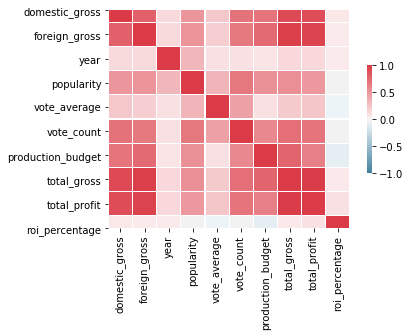

In [13]:
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Try scatter plot between domestic and foreign 
sns.heatmap(movie_db.corr(), cmap=cmap, vmin = -1, vmax=1, 
            center=0, linewidths=.1, square = True, cbar_kws={"shrink": .5});
plt.savefig('images/heatmap_movie_db.png', bbox_inches = "tight");

#### The scatter plot shows that tere is little to no correlation between the ROI and way the movies perform. However, popularity of the title has a slight positive correlation with the domestic gross and foreign gross, which would impact the total gorss and total profit as depicted in the correlation plot (with a slight positive correlation with popularity). Vote count has a stronger positive correlation domestic gross, foreign gross, total gorss and total profit. 

We see that Buena Vista (BV) has the highest total profits in the market and Universal (Uni.) has a healthy ROI. Let's see the what movies they have produced between 2010-2018.  

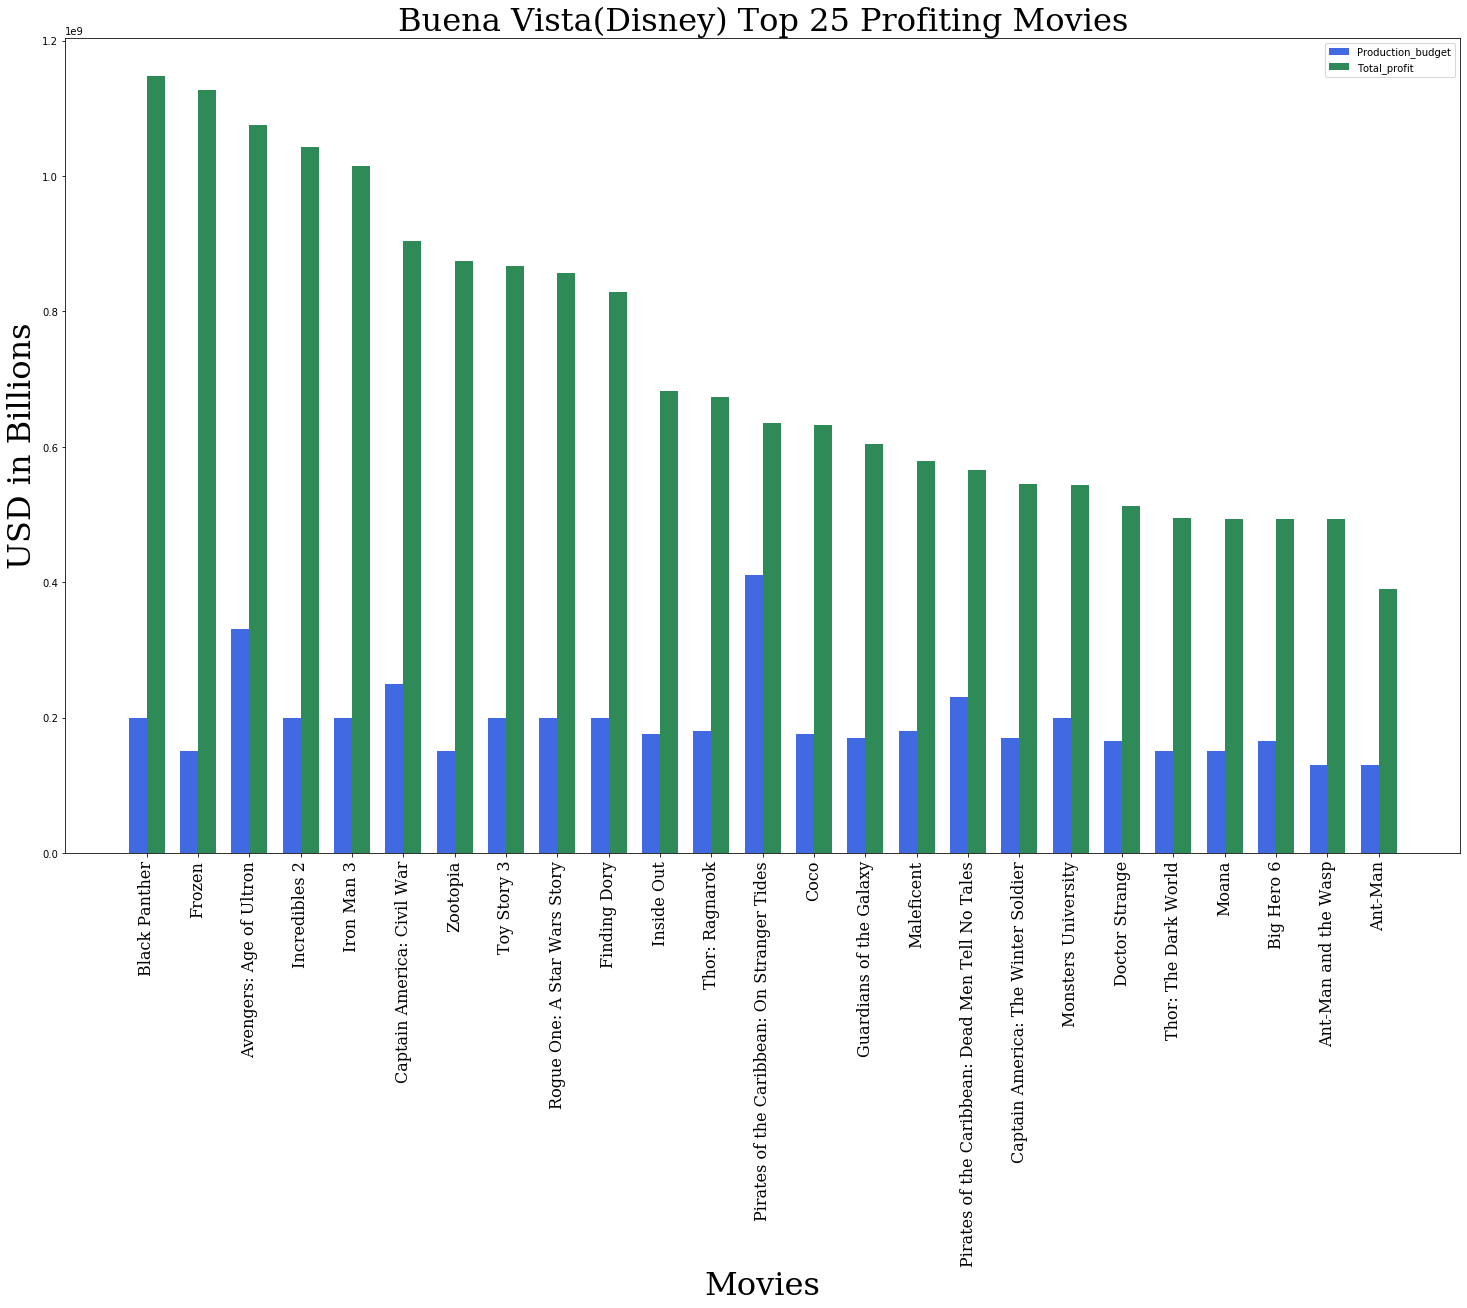

<Figure size 432x288 with 0 Axes>

In [14]:
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 32,
        }

font3 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
N = 25
bv=movie_db.loc[movie_db["studio"]== "BV"]
bv_25=bv.sort_values("total_profit", ascending = False)[:25]
bv_movies=bv.groupby(["year"])["studio"].value_counts(ascending = False)
x = bv_25['title']
y2 = bv_25['total_profit']
y1 = bv_25['production_budget']
r = bv_25["roi_percentage"]
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
budget = ax.bar(ind, y1, width, color='royalblue')
total = ax.bar(ind+width, y2, width, color='seagreen')

ax.set_ylabel('USD in Billions', fontdict = font2)
ax.set_title("Buena Vista(Disney) Top 25 Profiting Movies", fontdict = font2)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation = 90)
ax.set_xticklabels(x, fontdict = font3)
ax.set_xlabel("Movies", fontdict = font2)

ax.legend((budget[0], total[0]), ('Production_budget', 'Total_profit'))

plt.show();
plt.savefig('images/bv_top25_movies.png', bbox_inches = "tight");

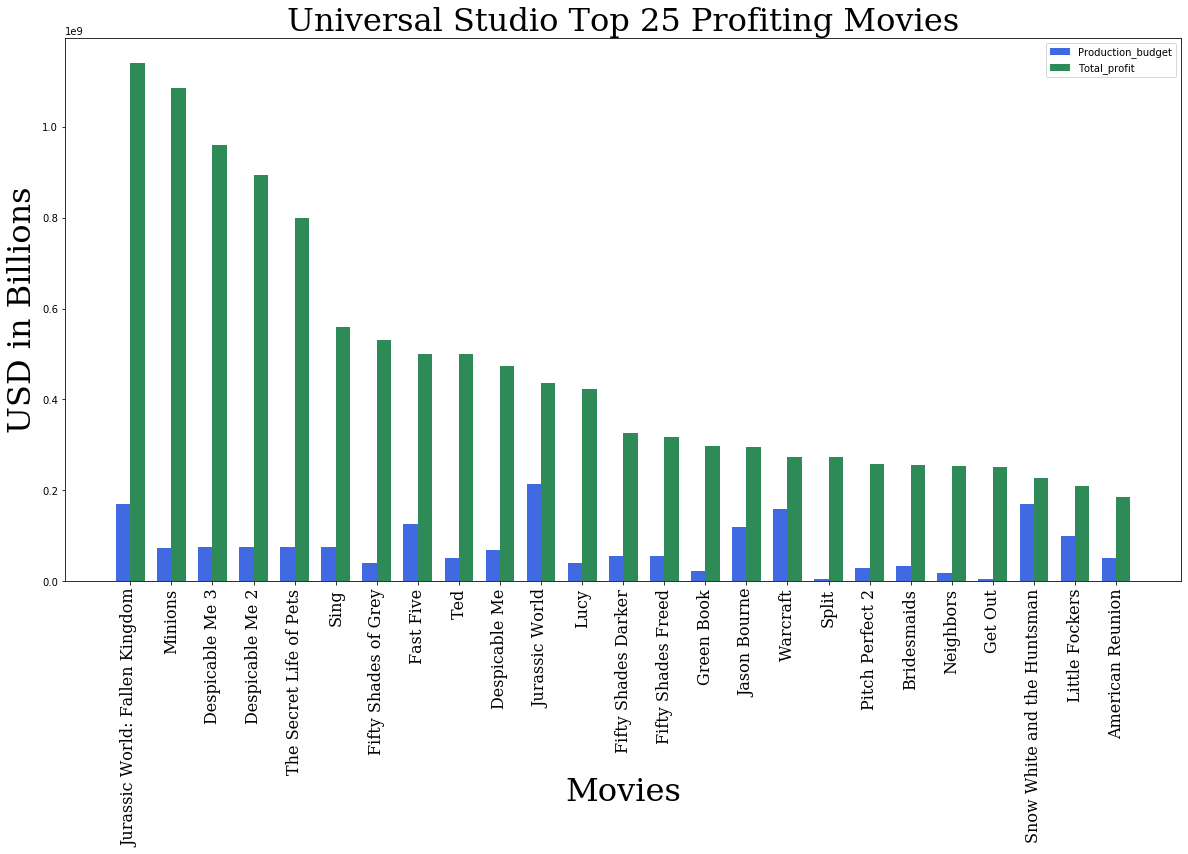

<Figure size 432x288 with 0 Axes>

In [15]:
#looking at the amount of movies released by year
uni=movie_db.loc[movie_db["studio"] == "Uni."]
uni_25=uni.sort_values("total_profit", ascending = False)[:25]
N = 25
x = uni_25['title']
y2 = uni_25['total_profit']
y1 = uni_25['production_budget']

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
budget = ax.bar(ind, y1, width, color='royalblue')
total = ax.bar(ind+width, y2, width, color='seagreen')

ax.set_ylabel('USD in Billions', fontdict = font2)
ax.set_title("Universal Studio Top 25 Profiting Movies", fontdict = font2)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation = 90)
ax.set_xticklabels(x, fontdict = font3)
ax.set_xlabel("Movies", fontdict = font2, labelpad = -70)

ax.legend( (budget[0], total[0]), ('Production_budget', 'Total_profit') )

plt.show();
plt.savefig('images/universal_top25_movies.png', bbox_inches = "tight");

We see that Buena Vista capatilizes on the popular themed movies like Marvel's Avenger Franchise. Where as Universal capatilizes on the Animation and franchise as well. 

#### However, the movies with the best ROI happens to be in the horror and thriller category:

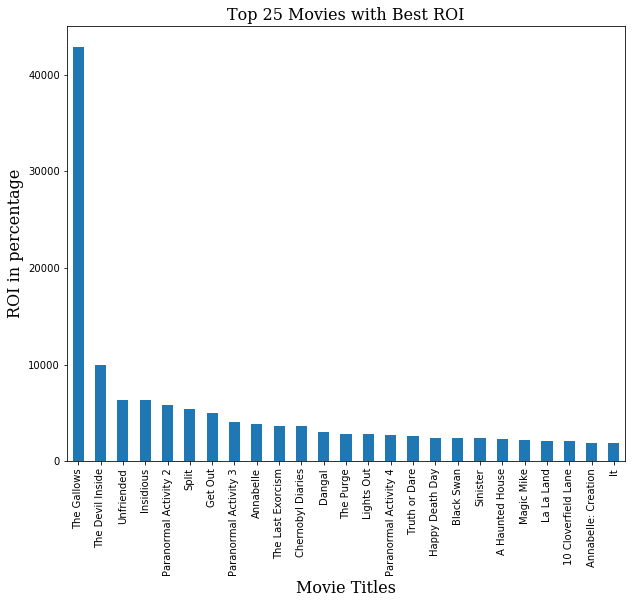

In [16]:
movie_db.set_index("title", inplace = True)

best_roi=movie_db["roi_percentage"].sort_values(ascending=False)[:25]

best_roi.plot(kind="bar", figsize = (10,8))
plt.title("Top 25 Movies with Best ROI", fontdict = font)
plt.ylabel("ROI in percentage", fontdict = font)
plt.xlabel("Movie Titles", fontdict = font);

# Conclusion 

With these film tycoons capitalizing on franchises and producing large quantities of movie in a given year, it would be hard for Microsoft to make a breakthrough and have great ROI. Therefore, I would recommend Microsoft to not enter the movie industry but to partner with these studios and create a streaming platform that interacts with their already built artificially intelligent assistant, Cortana. However, if they would still like to persue, I would suggest either to start with either a horror/thriller movie, a franchise or an animation.  

# Further Analysis/Next Steps
- If Microsoft would stil like to persue with the film division, then I would like to webscrape and have additional data from Netflix, Hulu, NBC's Peacock and Amazon Prime Videos. It would be fruitful to look into not just movies and films but also consider television series. 

- I would also webscrape Twitter and Instagram to see the fan support/strength for the movies, tv shows and actors. It would also be very insightful to discover if there is a larger presence of certain actors in social media and how that might increase or decrease the film marketing and promotion. I would also consider looking into how the studios market their movies and compare if one strategy is stronger than the other

- Additionally, I would try to generate a Machine Learning algorithm that would analyze previous scripts, raitings and reviews from the web and predict how a movie will perform based on a script, director and actors information. 

- If they would like to persue in the path of a streaming platform, I believe it would be more cost efficient since Microsoft already has server farms. Additionally Cortana now comes built in with the new Windows laptops and apps can be downloaded over the web. However, the financial aspects would require more data. I would scrape information on Netflix and Amazon Prime Videos, since they are most similar to Microsoft and its potential. 